## $R_{0}$ Becslése

Két gyakran használt statisztikai becslési módszert fogunk megvizsgálni:  
(1) Exponenciális növekedési ütem alkalmazása $R_{0}$ becslésére (_exponential growth rate_)  
(2) Tényleges 'szaporodási' számmal való közelítés  



**(1) Módszer alkalmazása**  
Két statisztikai lépésben végezhető el ez a becslés: megbecsüljük az exponenciális növekedési ütemet, amit _r_ jelöl, majd _r_ segítségével kiszámítjuk $R_{0}$ értéket.

In [1]:
import sympy as sp

t=sp.Symbol('t')
j=sp.Function('j')
tau=sp.symbols(u'τ') #megfertőződés óta eltelt idő
A=sp.Function('A')


val=sp.integrate(A(tau)*j(t-tau), (tau, 0, sp.oo))

expr1=sp.Equality(j(t), val)
expr1

Eq(j(t), Integral(A(τ)*j(t - τ), (τ, 0, oo)))

Ha feltesszük, hogy a járvány kezdetekor $j(t)$ exponenciálisan növekedő _r_ sebességgel (ami az exponenciális növekedési ütem),  
akkor ebben az esetben könnyen megkapható $A(\tau)$

In [2]:
k=sp.Symbol('k')
r=sp.Symbol('r')
expr2=sp.Equality(j(t), k*sp.E**(r*t))
expr3=sp.Equality(j(t-tau), k*sp.E**(r*t)*sp.E**(-r*tau))

display(expr2,expr3)

Eq(j(t), k*exp(r*t))

Eq(j(t - τ), k*exp(r*t)*exp(-r*τ))

Egy egyszerű behelyettesítéssel megkaphatjuk:

In [3]:
expr4=sp.Equality(k*sp.E**(r*t), sp.integrate(A(tau)*k*sp.E**(r*t)*sp.E**(-r*tau), (tau, 0, sp.oo)))
display(expr4)

Eq(k*exp(r*t), k*exp(r*t)*Integral(A(τ)*exp(-r*τ), (τ, 0, oo)))

Mivel a sympy rendkívűl okos, ki is hozta az integrálból azokat a tagokat, amik nem függnek $\tau$-tól. Egy egyszerű átosztással pedig a következő egyenlőséget kapjuk:

In [4]:
expr5=sp.Equality(1, sp.integrate(A(tau)*sp.E**(-r*tau), (tau, 0, sp.oo)))
display(expr5)

Eq(1, Integral(A(τ)*exp(-r*τ), (τ, 0, oo)))

Mostmár közel vagyunk ahhoz, hogy meghatározzuk $A(\tau)$-t és onnan már egy egyszerű lépés, hogy kapjunk egy értéket $R_{0}$-ra is. Ehhez vesszük $g(\tau)$ függvényt, ami 'generálódási' idő sűrűségfüggvénye, azaz azt mondja meg, hogy $\tau$ idő alatt mennyire gyakori a másodlagos megbetegedések száma.

In [5]:
g=sp.Function('g')
s=sp.Symbol('s')
expr6=sp.Equality(g(tau), A(tau)/sp.integrate(A(s), (s, 0, sp.oo)))
display(expr6)

Eq(g(τ), A(τ)/Integral(A(s), (s, 0, oo)))

Itt a nevező jelentése: az összes elsődlegesen megfertőzödött egyén által megfertőzött másodlagos fertőzések száma, ami a definícionk alapján pont $R_{0}$. Vagyis azt kapjuk, hogy:

In [6]:
R_0=sp.Symbol('R_0')
expr7=sp.Equality(g(tau), A(tau)/R_0)
expr8=sp.Equality(A(tau), R_0*g(tau))
display(expr7, expr8)

Eq(g(τ), A(τ)/R_0)

Eq(A(τ), R_0*g(τ))

Ezt visszahelyettesítve az (5)-ös egyenletünkbe megkapjuk:

In [7]:
expr9=sp.Equality(1, sp.integrate(R_0*g(tau)*sp.E**(-r*tau), (tau, 0, sp.oo)))
expr10=sp.Equality(R_0, 1/sp.integrate(g(tau)*sp.E**(-r*tau), (tau, 0, sp.oo)))
display(expr9, expr10)

Eq(1, R_0*Integral(g(τ)*exp(-r*τ), (τ, 0, oo)))

Eq(R_0, 1/Integral(g(τ)*exp(-r*τ), (τ, 0, oo)))

Ezzel megkapunk egy becslést $R_{0}$-ra, amihez két adatra van szükségünk:  
(1) a már említett _r_ exponenciális növekedési ütem  
(2) valamint a $g(\tau)$, ami a másodlagos megfertőződések száma $\tau$ idő alatt  
  
Persze számos másfajta becslése is létezik $R_{0}$-nak, pl. az Actual Reproduction Number segítségével vett közelítés, ML-becslés, SIR modellből származtatott $R_{0}$ és még sok más.
A korábbiakban levezetett 'képlet' $R_{0}$-ra talán a leggyakrabban használt számítási módszer, de kell hozzá _r_.

### r meghatározása
**'Pure Birth Process' (Folytonos Markov Láncok spec. esete)**  
Ha ismert a 0-adik időpillanattól a $t-1$-edik időpillanatig az új fertőzések száma (azaz, amit $j(t)$-vel jelöltünk korábban), akkor a $t$-edik időpillanatban az esetek számának ($J_{t}$) felételes valószínűsége a következő kifejezéssel arányos:

In [23]:
J_i=sp.Symbol('J_i')
J_t=sp.Symbol('J_t')
J_0=sp.Symbol('J_0')
i=sp.Symbol('i')
expr11=sp.E**(-r*sp.Sum(J_i, (i, 0, t-1)))*(1-sp.E**(-r))**(J_t-J_0)
display(expr11)

(1 - exp(-r))**(-J_0 + J_t)*exp(-r*Sum(J_i, (i, 0, t - 1)))

Ebből meghatározható _r_ Maximum-Likelihood becsléssel (és adható 95%-os konfidenciaintervallum)

In [33]:
#TO DO
#Plotolások R_0-ra

### Transmission Trees - A terjedés modellezése

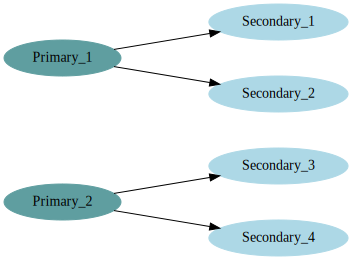

In [184]:
import graphviz

T1=graphviz.Digraph('T1', engine='neato')

T1.node('Primary_1', pos='-2,1!', color='cadetblue', style='filled')
T1.node('Primary_2', pos='-2,-1!', color='cadetblue', style='filled')
T1.node('Secondary_1', pos='1,1.5!', color='lightblue', style='filled')
T1.node('Secondary_2', pos='1,0.5!', color='lightblue', style='filled')
T1.node('Secondary_3', pos='1,-0.5!', color='lightblue', style='filled')
T1.node('Secondary_4', pos='1, -1.5!', color='lightblue', style='filled')

T1.edge('Primary_1', 'Secondary_1') #, style='dashed')
T1.edge('Primary_1', 'Secondary_2')
T1.edge('Primary_2', 'Secondary_3')
T1.edge('Primary_2', 'Secondary_4')

display(T1)

És akkor persze nézhetünk további lépcsőket: a másodlagos fertőzöttek elsődleges fertőzök lesznek. (Persze ez egy nagyon leegyszerűsített modell, mert a korábbi Primary-k is fertőzhetnek még, de ettől most eltekintünk)

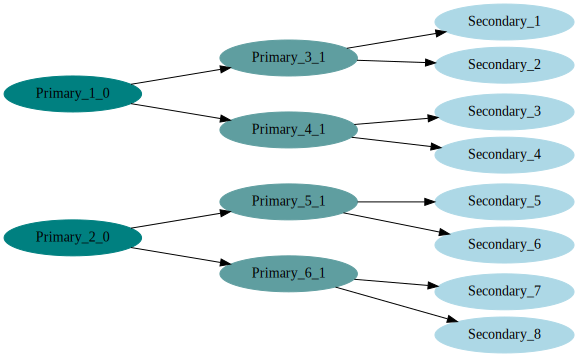

In [172]:
T2=graphviz.Digraph('T2', engine='neato')

T2.node('Primary_1_0', pos='-2,2!', color='teal', style='filled')
T2.node('Primary_2_0', pos='-2,0!', color='teal', style='filled')

T2.node('Primary_3_1', pos='1,2.5!', color='cadetblue', style='filled')
T2.node('Primary_4_1', pos='1,1.5!', color='cadetblue', style='filled')
T2.node('Primary_5_1', pos='1,0.5!', color='cadetblue', style='filled')
T2.node('Primary_6_1', pos='1, -0.5!', color='cadetblue', style='filled')

T2.node('Secondary_1', pos='4,3!', color='lightblue', style='filled')
T2.node('Secondary_2', pos='4,2.4!', color='lightblue', style='filled')
T2.node('Secondary_3', pos='4,1.75!', color='lightblue', style='filled')
T2.node('Secondary_4', pos='4,1.15!', color='lightblue', style='filled')
T2.node('Secondary_5', pos='4,0.5!', color='lightblue', style='filled')
T2.node('Secondary_6', pos='4, -0.1!', color='lightblue', style='filled')
T2.node('Secondary_7', pos='4,-0.75!', color='lightblue', style='filled')
T2.node('Secondary_8', pos='4, -1.35!', color='lightblue', style='filled')

T2.edge('Primary_1_0', 'Primary_3_1') #, style='dashed')
T2.edge('Primary_1_0', 'Primary_4_1')
T2.edge('Primary_2_0', 'Primary_5_1')
T2.edge('Primary_2_0', 'Primary_6_1')

T2.edge('Primary_3_1', 'Secondary_1')
T2.edge('Primary_3_1', 'Secondary_2')
T2.edge('Primary_4_1', 'Secondary_3')
T2.edge('Primary_4_1', 'Secondary_4')
T2.edge('Primary_5_1', 'Secondary_5')
T2.edge('Primary_5_1', 'Secondary_6')
T2.edge('Primary_6_1', 'Secondary_7')
T2.edge('Primary_6_1', 'Secondary_8')

display(T2)

**Hol jön be itt az $R_{0}$?**  
Egy ilyen 'transmission tree' rendszerint nem figyelhető meg, hacsak nem hajtanak végre szigorú kontakt nyomonkövetést mikrobiológiai vizsgálattal. Ehelyett egy valószínűségszámítás alapú rekonstrukciót csinálnak.

A másik, nem levezetett becslés, (ami $R_{a}$-t használja) átvihető diszkrét esetbe. Ez kell is, mivel az addatokat évente nézzük. Ekkor a becsült $R_{0}$ érték:

In [209]:
j_t=sp.Symbol('j_t')
j_t_s=sp.Symbol('j_t-s')
g_s=sp.Symbol('g_s')

display(sp.Equality(R_0, j_t/sp.Sum(g_s*j_t_s, (s, 0, sp.oo))))
display(sp.Equality(1/R_0, sp.Sum(g_s*j_t_s, (s, 0, sp.oo))/j_t))

Eq(R_0, j_t/Sum(g_s*j_t-s, (s, 0, oo)))

Eq(1/R_0, Sum(g_s*j_t-s, (s, 0, oo))/j_t)

Ha ennek az egyenletnek vesszük a reciprokát, akkor az egyenlőség jobboldalán álló kifejezés  
--számlálója: a potenciális elsődlegesen fertőzöttek kapcsolatfelvételének száma, ami egyenlős valószínúséggel eredményez másodlagos fertőződést  
--nevezője: a másodlagos fertőzések száma  
Így ez a kifejezés a sikeres továbbfertőzés valószínűségét fejezi ki, ami így a baloldal szerint $\frac{1}{R_{0}}$


Ha figyelembe vesszük a hányados által meghatározott valószínűséget, akkor adhatunk egy várható értéket a következőleg megfertőzödöttek számára. Ekkor nem teljesen úgy fog kinézni az ábránk, mint a korábbiakban.

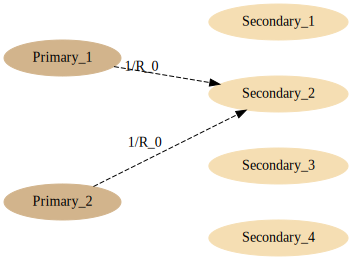

In [208]:
T3=graphviz.Digraph('T3', engine='neato')

T3.node('Primary_1', pos='-2,1!', color='tan', style='filled')
T3.node('Primary_2', pos='-2,-1!', color='tan', style='filled')
T3.node('Secondary_1', pos='1,1.5!', color='wheat', style='filled')
T3.node('Secondary_2', pos='1,0.5!', color='wheat', style='filled')
T3.node('Secondary_3', pos='1,-0.5!', color='wheat', style='filled')
T3.node('Secondary_4', pos='1, -1.5!', color='wheat', style='filled')

T3.edge('Primary_1', 'Secondary_2', style='dashed', xlabel=f'{sp.cancel(1/R_0)}')
T3.edge('Primary_2', 'Secondary_2', style='dashed', xlabel=f'{sp.cancel(1/R_0)}')

display(T3)